In [48]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [68]:
%run qBOLD_fun.ipynb

In [50]:
# Read median data from the csv
data = AverageFileReadandFilter("D:/Research/TUM/python_input/Glasser360_nw_values_qBOLD_GM_masked_allsubjects.csv", 
                         ["calc","control"], thres = 20)

In [51]:
preparation(["calc", "control"], 30)

In [52]:
# calculate relative change for CBF and CMRO2
applyFuncToDf(rc("CBF"), data, colName = "rcCBF")
applyFuncToDf(rc("CMRO2"), data, colName = "rcCMRO2")

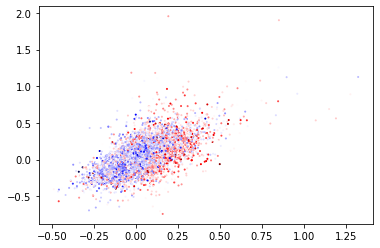

In [53]:
plt.scatter(data.rcCBF, data.rcCMRO2, c=data.BOLDcalccontrol, s=1, cmap = "seismic", vmin=-2, vmax=2)

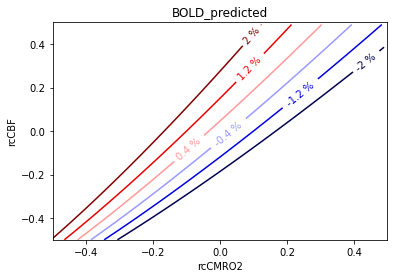

In [57]:
# Range of x and y axis
CMRO2 = np.arange(-0.5, 0.5, 0.01)
CBF = np.arange(-0.5, 0.5, 0.01)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(CMRO2, CBF)
  
fig, ax = plt.subplots(1, 1)
  
a = 0.25; b=1; M=12

# Davis model
Z = M*(1-((Y+1)**(a-b))*(X+1)**b)

# cmap gives the color scheme, and levels define that 6 contour lines will be drawn for BOLD value between -0.2 and 0.2
CS = ax.contour(X, Y, Z, cmap = "seismic", levels=np.linspace(-2,2,6))

# format in percentage
def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"

ax.clabel(CS, CS.levels, inline=True,fontsize=10, fmt=fmt)
#ax.clabel(CS, CS.levels, inline=True,fontsize=10)

ax.set_title('BOLD_predicted')
ax.set_xlabel('rcCMRO2')
ax.set_ylabel('rcCBF')
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)

plt.show()

In [102]:
# calculate BOLD/M
def ratio(row):
    return row["BOLD"+condG[0]+condG[1]]/row["M"+condG[1]]
applyFuncToDf(M, data)
applyFuncToDf(ratio, data3, colName = "BOLD_M")

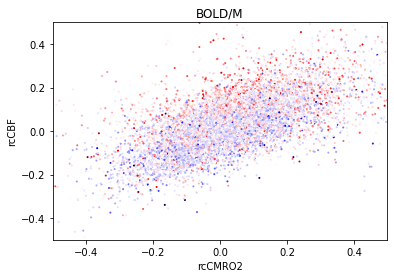

In [164]:
fig, ax = plt.subplots(1, 1)
data2 = data.loc[data["parcel"] == 1]
ax.scatter(data.rcCMRO2, data.rcCBF, c=data.BOLD_M, s=1, cmap = "seismic", vmin=-0.2, vmax=0.2)
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_title('BOLD/M')
ax.set_xlabel('rcCMRO2')
ax.set_ylabel('rcCBF')
plt.show()

In [3]:
# get the 11 subjects with CBV measurement
data3 = pd.DataFrame(data.dropna())

In [123]:
applyFuncToDf(rc("CBV"), data3, colName = "rcCBV")
applyFuncToDf(rc("OEF"), data3, colName = "rcOEF")

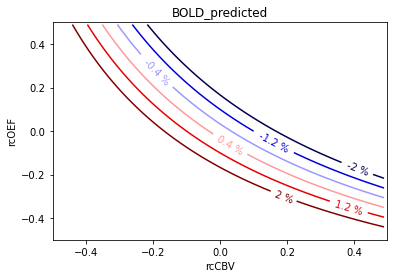

In [160]:
CBV = np.arange(-0.5, 0.5, 0.01)
OEF = np.arange(-0.5, 0.5, 0.01)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(CBV, OEF)
  
fig, ax = plt.subplots(1, 1)
  
a = 0.25; b=1; M=12
Z = M*(1-((Y+1)**(b))*(X+1))

# fmt = ticker.ScalarFormatter()
# fmt.create_dummy_axis()
# plots contour lines
CS = ax.contour(X, Y, Z, cmap = "seismic", levels=np.linspace(-2,2,6))
def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"

ax.clabel(CS, CS.levels, inline=True,fontsize=10, fmt=fmt)
#ax.clabel(CS, CS.levels, inline=True,fontsize=10)
ax.set_title('BOLD_predicted')
ax.set_xlabel('rcCBV')
ax.set_ylabel('rcOEF')
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)

plt.show()

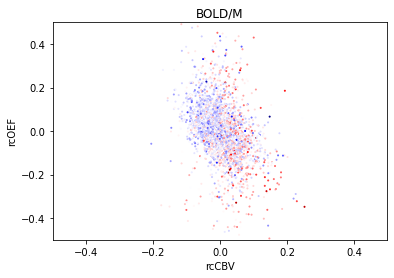

In [154]:
fig, ax = plt.subplots(1, 1)
ax.scatter(data3.rcCBV, data3.rcOEF, c=data3.BOLD_M, s=1, cmap = "seismic", vmin=-0.2, vmax=0.2)
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_title("BOLD/M")
ax.set_xlabel('rcCBV')
ax.set_ylabel('rcOEF')
plt.show()

rcCMRO2: (-0.2,-0.15)


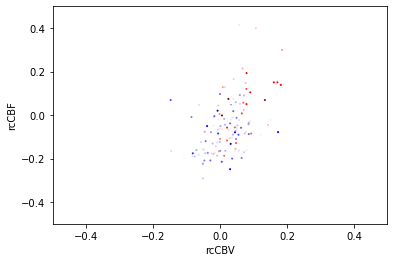

rcCMRO2: (-0.15,-0.1)


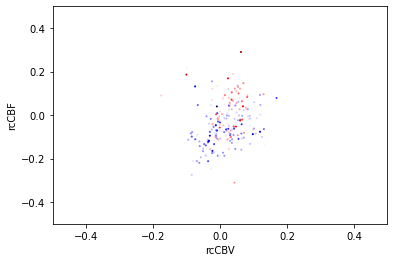

rcCMRO2: (-0.1,-0.05)


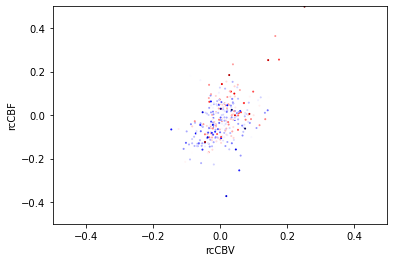

rcCMRO2: (-0.05,-0.0)


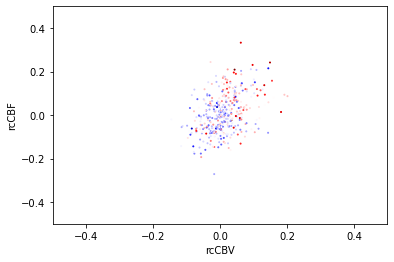

rcCMRO2: (-0.0,0.05)


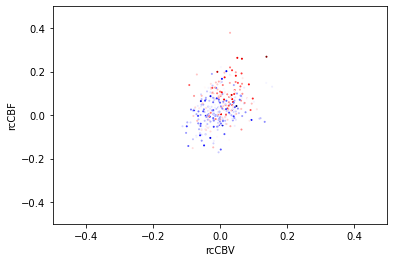

rcCMRO2: (0.05,0.1)


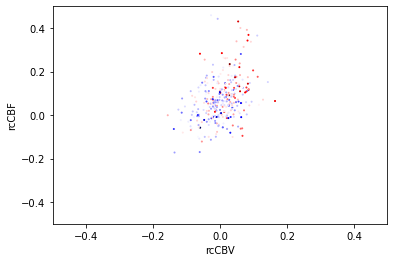

rcCMRO2: (0.1,0.15)


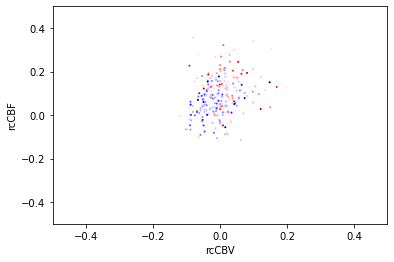

rcCMRO2: (0.15,0.2)


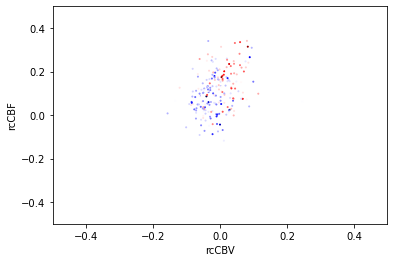

In [152]:
for i in np.arange(-0.2,0.2,0.05):
    mask = (i <= data3["rcCMRO2"]) & (data3["rcCMRO2"] < i+0.05)
    fig, ax = plt.subplots(1, 1)
    ax.scatter(data3[mask].rcCBV, data3[mask].rcCBF, c=data3[mask].BOLD_M, s=1, cmap = "seismic", vmin=-0.1, vmax=0.1)
    ax.set_xlim(-0.5,0.5)
    ax.set_ylim(-0.5,0.5)
    ax.set_xlabel('rcCBV')
    ax.set_ylabel('rcCBF')
    print("rcCMRO2: ("+str(round(i, 2))+","+str(round(i+0.05, 2))+")")
    plt.show()

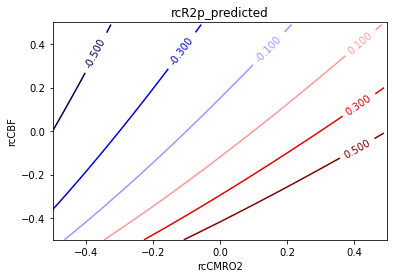

In [177]:
CMRO2 = np.arange(-0.5, 0.5, 0.01)
CBF = np.arange(-0.5, 0.5, 0.01)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(CMRO2, CBF)
  
fig, ax = plt.subplots(1, 1)
  
a = 0.25; b=1;
Z = ((Y+1)**(a-b))*(X+1)**b - 1

CS = ax.contour(X, Y, Z, cmap = "seismic", levels=np.linspace(-0.5,0.5,6))
def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"

#ax.clabel(CS, CS.levels, inline=True,fontsize=10, fmt=fmt)
ax.clabel(CS, CS.levels, inline=True,fontsize=10)

ax.set_title("rcR2p_predicted")
ax.set_xlabel('rcCMRO2')
ax.set_ylabel('rcCBF')
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)

plt.show()

In [65]:
applyFuncToDf(rc("R2p"), data, colName = "rcR2p")

In [69]:
applyFuncToDf(FujitaR2pRelChange, data)

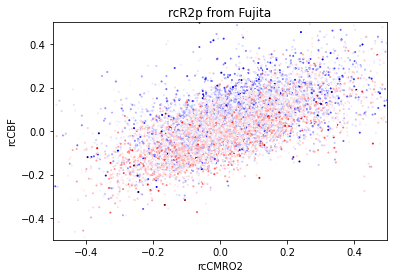

In [74]:
fig, ax = plt.subplots(1, 1)
ax.scatter(data.rcCMRO2, data.rcCBF, c=data.rcFR2Pcalccontrol, s=1, cmap = "seismic", vmin=-0.2, vmax=0.2)
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_title("rcR2p from Fujita")
ax.set_xlabel('rcCMRO2')
ax.set_ylabel('rcCBF')
plt.show()

In [75]:
applyFuncToDf(rc("R2p"), data3, colName="rcR2p")
applyFuncToDf(rc("CBF"), data3, colName="rcCBF")
applyFuncToDf(rc("CBV"), data3, colName="rcCBV")
applyFuncToDf(rc("OEF"), data3, colName="rcOEF")

In [76]:
# Calculate CMRO2 using 3 different approaches
applyFuncToDf(DavisCMRO2RelChange, data3, b=1)
applyFuncToDf(rc("CMRO2"), data3, colName = "rcCMRO2")
applyFuncToDf(FujitaCMRO2RelChange, data3)

<ipython-input-68-59adbe33ba32>:4: UserWarning: alpha is not specified and acalc is not in the dataframe
Calculating alpha based on CBF and CBV now
  warnings.warn(str("alpha is not specified and a"+condG[0] + " is not in the dataframe\n"+
<ipython-input-68-59adbe33ba32>:12: UserWarning: M is not specified and Mcontrol is not in the dataframe
Calculating M based on R2p and TE now
  warnings.warn(str("M is not specified and M"+condG[1] + " is not in the dataframe\n"+


Text(0.5, 0.98, 'CMRO2 comparison')

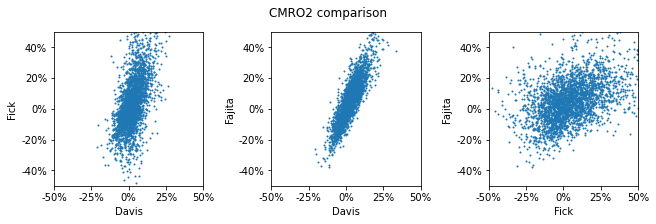

In [77]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3), constrained_layout=True)
#fig.tight_layout()
ax[0].scatter(data3.rcDCMRO2calccontrol_b1, data3.rcCMRO2, s=1)
ax[1].scatter(data3.rcDCMRO2calccontrol_b1, data3.rcFCMRO2calccontrol, s=1)
ax[2].scatter(data3.rcCMRO2, data3.rcFCMRO2calccontrol, s=1)
ax[0].set_xlabel('Davis')
ax[0].set_ylabel('Fick')
ax[1].set_xlabel('Davis')
ax[1].set_ylabel('Fajita')
ax[2].set_xlabel('Fick')
ax[2].set_ylabel('Fajita')

ax[0].set_xlim(-0.5,0.5)
ax[0].set_ylim(-0.5,0.5)
ax[1].set_xlim(-0.5,0.5)
ax[1].set_ylim(-0.5,0.5)
ax[2].set_xlim(-0.5,0.5)
ax[2].set_ylim(-0.5,0.5)

ticks = ticker.FuncFormatter('{0:.0%}'.format)
ax[0].xaxis.set_major_formatter(ticks)
ax[0].yaxis.set_major_formatter(ticks)
ax[1].xaxis.set_major_formatter(ticks)
ax[1].yaxis.set_major_formatter(ticks)
ax[2].xaxis.set_major_formatter(ticks)
ax[2].yaxis.set_major_formatter(ticks)
fig.suptitle('CMRO2 comparison')